# House Prices - Advanced Regression

In [3]:
# Importing the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing the 'train.csv' and 'test.csv' as pandas.dataframe

df_1 = pd.read_csv('train.csv')
df_2 = pd.read_csv('test.csv')
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Creating a DataFrame with all the columns having null values

df_null = df[df.isna().sum()[df.isna().sum()>0].index]

In [7]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

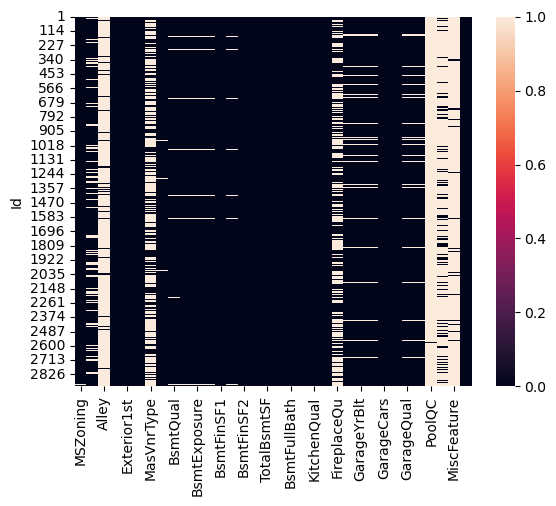

In [8]:
# Creating a headmap to visualize the occurance of null values

sns.heatmap(df_null.isna())

In [9]:
# Creating a DataFrame to hold the columns which are 'objects' 
df_objects = df[df.select_dtypes(include = ['object']).columns]

# Dropping columns with dtype 'object' and has more than 1100 null instances
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()>1100].index], axis = 1)

In [10]:
# Dropping columns wih more than 1100 null instances
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum()>1100].index], axis = 1)

# Replacing NaN with 'null'
df_objects = df_objects.fillna('null')

# One hot encoding 'df_objects'
df_objects_encoded = pd.get_dummies(df_objects)


In [11]:
df_objects['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
null          4
Name: count, dtype: int64

In [12]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [13]:
# Dropping all 'null' columns created during one hot encoding (redundant data)

for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [14]:
# Creating new DataFrame with the encoded columns
new_df = pd.concat([df, df_objects_encoded], axis = 1)

len(df.columns), len(df_objects_encoded.columns), len(new_df.columns)

(74, 230, 304)

In [15]:
# Dropping columns with dtypr 'object' from new_df
new_df = new_df.drop(df.select_dtypes(include =['object']), axis = 1)

new_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [16]:
# Checking for NaN values in new_df 
new_df.isna().sum()[new_df.isna().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

<Axes: ylabel='Id'>

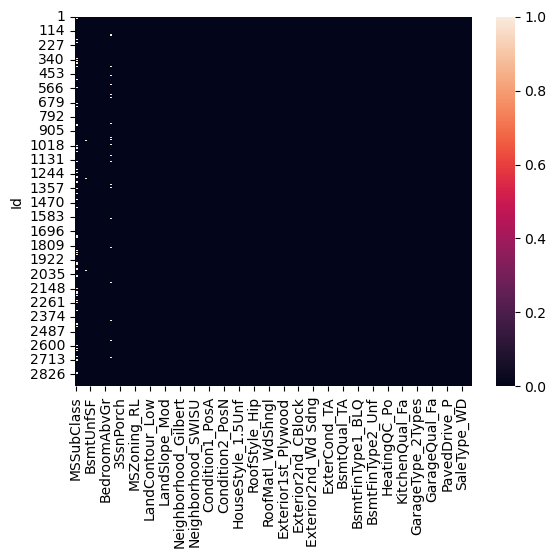

In [17]:
sns.heatmap(new_df.isna())

In [18]:
# Defining columns to be filled using mode and mean strategies
mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

# Filling NaN with Mode strategy
for i in mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

# Filling NaN with Mean Strategy
for i in mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

In [19]:
# Verifying for NaN values 
new_df.isna().max(axis = 0).max()

False

In [20]:
# Splitting the training data and testing data used (df_1, df_2)
training_data = new_df[0: len(df_1)]
test_data = new_df[len(df_1):]

# Dropping 'SalePrice' from test data
test_data = test_data.drop(columns='SalePrice')

In [21]:
# Importing required libraries for machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Creating X_train, X_test, Y_train, Y_test for Regression

X = training_data.drop(columns = 'SalePrice')
y = training_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Reshaping from 1D array to 2D array
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

X_train.shape, y_train.shape

((1168, 266), (1168, 1))

In [23]:
# Linear Regression

model_1 = LinearRegression().fit(X, y)
y1_pred = model_1.predict(X_test)

mean_squared_error(y_test, y1_pred)

350080400.062542

In [24]:
# XGBRegressor

model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y2_pred = model_2.predict(X_test)
mean_squared_error(y_test, y2_pred)

5907.6840052669995

In [25]:
# Random Forrest Regressor

model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y3_pred = model_3.predict(X_test)
mean_squared_error(y_test, y3_pred)

74888170.4483118

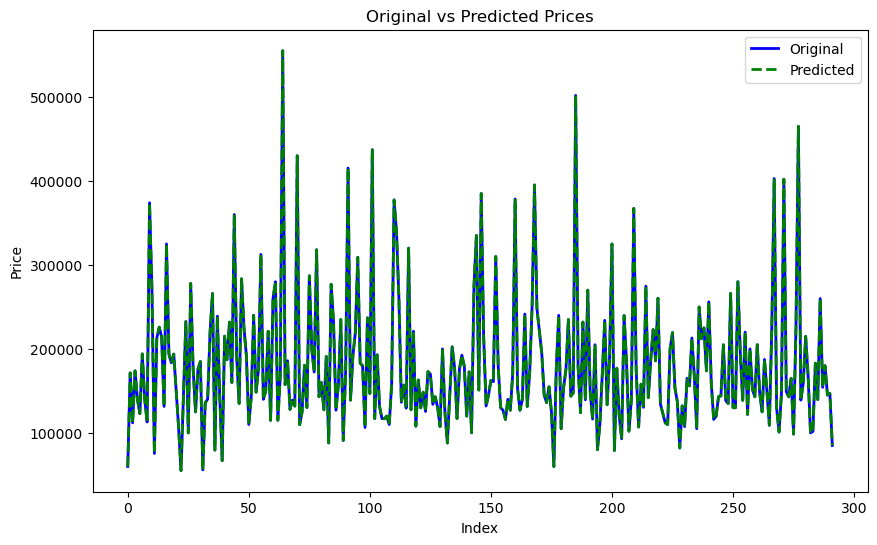

In [26]:
# Plotting Original vs Predicted values (XGBRegressor)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linestyle='-', linewidth=2)
plt.plot(np.arange(len(y_test)), y2_pred, label='Predicted', color='green', linestyle='--', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [27]:
# The XGBRegressor performs best hence using model_2 for final prediction

pred = model_2.predict(test_data)

final = pd.DataFrame()
final['Id'] = test_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)